In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

#reading the data points generated from theory using pandas for 11Be
Be11Df = pd.read_fwf('11Be_theoritical.dat', names = ["momentum", "differential cross section"])

#reading the data points generated from theory using pandas for 19C
C19Df = pd.read_fwf('c-19 data points.txt', names = ["momentum", "differential cross section"])
C19Df.sort_values(["momentum"], axis = 0, ascending = True, inplace = True)
print(C19Df)

        momentum  differential cross section
12   7263.525906                    0.905077
11   7265.107749                    1.125828
10   7266.758368                    1.214128
8    7268.363136                    1.589404
9    7269.990830                    1.766004
..           ...                         ...
106  7364.740945                    3.532009
107  7366.299862                    2.980132
108  7367.904631                    2.560706
109  7369.509399                    2.185430
110  7371.114168                    1.766004

[123 rows x 2 columns]


In [3]:
#reading the experimental data points for 11Be
exp= pd.read_fwf('11Be_exp.dat', names = ["momentum", "differential cross section"])

#reading the experimental data points for 19C
C19exp = pd.read_fwf('c-19 exp data points.txt', names = ["momentum", "differential cross section"])

print(C19exp)


      momentum  differential cross section
0  7265.268226                    8.145695
1  7282.187070                    8.344371
2  7296.217331                   23.245033
3  7310.247593                   38.741722
4  7325.309491                   47.682119
5  7344.085282                   23.245033
6  7360.178817                   13.907285


14.581140864351662
Root Mean squared Error:  37.97505622606805
R2:  0.9468962492834048


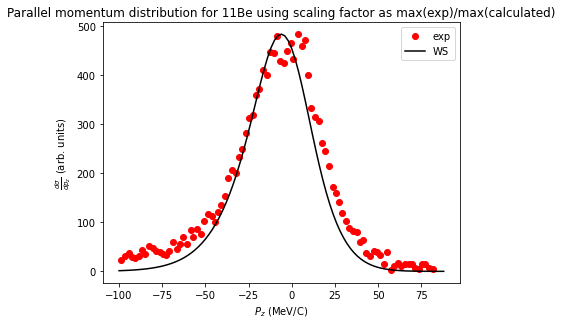

In [54]:
#using the (maximum value of experimental data/maximum value of theoritical data) as the sacling factor
sf1 = np.amax(exp['differential cross section'])/np.amax(Be11Df['differential cross section'])
print(sf1)
f2 = interp1d(Be11Df['momentum'], sf1*Be11Df['differential cross section'], kind='quadratic')

# finding out the parameters of the fit
print( "Root Mean squared Error: " ,math.sqrt(np.mean((exp['differential cross section']- f2(exp['momentum']))**2)))
ssr = np.sum((f2(exp['momentum']) - np.mean(exp['differential cross section']))**2)
sse = np.sum((exp['differential cross section']- f2(exp['momentum']))**2)
sst = ssr+sse;

print("R2: " ,ssr/sst)


plt.plot(exp['momentum'], exp['differential cross section'], 'ro', label = "Experimental data points")
plt.plot(Be11Df['momentum'], sf1*Be11Df['differential cross section'],color = 'Black', label = 'WS')
plt.legend(["exp", "WS"])
plt.xlabel('$P_z$ (MeV/C)')
plt.ylabel(r'$\frac{d\sigma}{dp_z}$ (arb. units)')
plt.title("Parallel momentum distribution for 11Be using scaling factor as max(exp)/max(calculated)")
plt.rcParams["figure.figsize"] = (6.4,4.8)
plt.show()

Root Mean squared Error:  4.772093243906407
R2:  0.9270203654736472


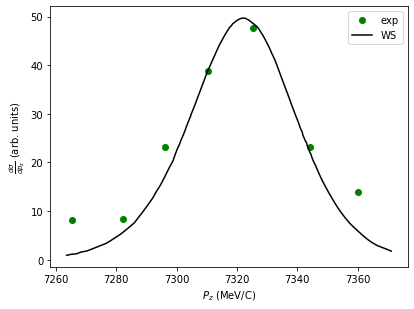

In [5]:
# finding out the parameters of the fit for 19C
f3 = interp1d(C19Df['momentum'], C19Df['differential cross section'], kind='quadratic')

#print(f3(C19exp['momentum']))
print( "Root Mean squared Error: " ,math.sqrt(np.mean((C19exp['differential cross section']- f3(C19exp['momentum']))**2)))
ssr = np.sum((f3(C19exp['momentum']) - np.mean(C19exp['differential cross section']))**2)
sse = np.sum((C19exp['differential cross section']- f3(C19exp['momentum']))**2)
sst = ssr+sse;

print("R2: " ,ssr/sst)

plt.plot(C19exp['momentum'], C19exp['differential cross section'],'go')
plt.plot(C19Df['momentum'], C19Df['differential cross section'],'black')
plt.legend(["exp", "WS"])
plt.xlabel('$P_z$ (MeV/C)')
plt.ylabel(r'$\frac{d\sigma}{dp_z}$ (arb. units)')
plt.rcParams["figure.figsize"] = (6.4,4.8)
plt.show()

Root Mean squared Error:  36.148092880367614
R2:  0.9559027446024494


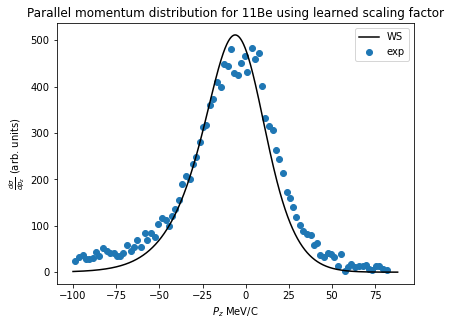

In [15]:
#learning the scaling factor
def bestfit(x, sf):
    f = interp1d(Be11Df['momentum'], sf*Be11Df['differential cross section'], kind='quadratic')
    return f(x)

pars0, cov0 = curve_fit(f=bestfit, xdata=exp['momentum'], ydata=exp['differential cross section'], p0=[1], bounds=(-np.inf, np.inf))
#print(pars0)

x0= np.linspace(-100, 88, 10000)
plt.scatter(exp['momentum'], exp['differential cross section'],label = 'Data' )
plt.plot(x0, bestfit(x0,*pars0), label = 'fit', color = 'Black')
#y = pars[0]*norm.pBe11Df(x,pars[1],pars[2])
plt.legend(["WS", "exp"])
plt.xlabel('$P_z$ MeV/C')
plt.ylabel(r'$\frac{d\sigma}{dp_z}$ (arb. units)')
plt.title("Parallel momentum distribution for 11Be using learned scaling factor")
plt.rcParams["figure.figsize"] = (6.4,4.8)


print( "Root Mean squared Error: " ,math.sqrt(np.mean((exp['differential cross section']- bestfit(exp['momentum'], *pars0))**2)))
ssr = np.sum((bestfit(exp['momentum'],pars0) - np.mean(exp['differential cross section']))**2)
sse = np.sum((exp['differential cross section']- bestfit(exp['momentum'], *pars0))**2)
sst = ssr+sse;

print("R2: " ,ssr/sst)

Root Mean squared Error:  26.584228773618104
R2:  0.973472510554927


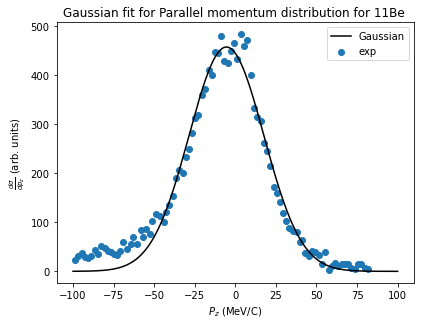

In [16]:
#fitting a Gaussian curve to the experimental data points for 11Be
def gaussian(x, a, b, c):
    return a*np.exp(-np.power(x - b, 2)/(2*np.power(c, 2)))

pars, cov = curve_fit(f=gaussian, xdata=exp['momentum'], ydata=exp['differential cross section'], p0=[1, 0, 2], bounds=(-np.inf, np.inf))
#print(pars)

plt.scatter(exp['momentum'], exp['differential cross section'],label = 'Data')
x1= np.linspace(-100, 100, 10000)
#y = pars[0]*norm.pBe11Df(x,pars[1],pars[2])
plt.plot(x1,gaussian(x1,*pars), label = 'fit', color = 'Black')
plt.legend(["Gaussian", "exp"])
plt.xlabel('$P_z$ (MeV/C)')
plt.ylabel(r'$\frac{d\sigma}{dp_z}$ (arb. units)')
plt.title("Gaussian fit for Parallel momentum distribution for 11Be ")
plt.rcParams["figure.figsize"] = (6.4,4.8)

print( "Root Mean squared Error: " ,math.sqrt(np.mean((exp['differential cross section']- gaussian(exp['momentum'], *pars))**2)))
ssr = np.sum((gaussian(exp['momentum'], *pars) - np.mean(exp['differential cross section']))**2)
sse = np.sum((exp['differential cross section']- gaussian(exp['momentum'], *pars))**2)
sst = ssr+sse;

print("R2: " ,ssr/sst)

plt.show()

[  45.20738651 7321.63057135   22.49520226]
Root Mean squared Error:  3.404806271949856
R2:  0.9502330407313543


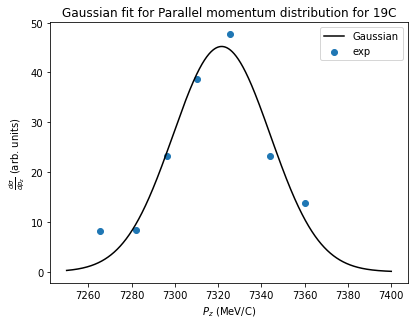

In [17]:
#fitting a Gaussian curve to the experimental data points for 19C

def gaussian(x, a, b, c):
    return a*np.exp(-np.power(x - b, 2)/(2*np.power(c, 2)))

pars3, cov3 = curve_fit(f=gaussian, xdata=C19exp['momentum'], ydata=C19exp['differential cross section'], p0=[1, 7330, 2], bounds=(-np.inf, np.inf))
print(pars3)

plt.scatter(C19exp['momentum'], C19exp['differential cross section'],label = 'Data')
x2 = np.linspace(7250, 7400, 10000)
#y = pars[0]*norm.pBe11Df(x,pars[1],pars[2])
plt.plot(x2,gaussian(x2,*pars3), label = 'fit', color = 'Black')
plt.legend(["Gaussian", "exp"])
plt.xlabel('$P_z$ (MeV/C)')
plt.ylabel(r'$\frac{d\sigma}{dp_z}$ (arb. units)')
plt.title("Gaussian fit for Parallel momentum distribution for 19C")
plt.rcParams["figure.figsize"] = (6.4,4.8)

print( "Root Mean squared Error: " ,math.sqrt(np.mean((C19exp['differential cross section']- gaussian(C19exp['momentum'], *pars3))**2)))
ssr = np.sum((gaussian(C19exp['momentum'], *pars3) - np.mean(C19exp['differential cross section']))**2)
sse = np.sum((C19exp['differential cross section']- gaussian(C19exp['momentum'], *pars3))**2)
sst = ssr+sse;

print("R2: " ,ssr/sst)

plt.show()

[495.21198431  -4.96668701 -22.24143942]
Root Mean squared Error:  28.440985498823032
R2:  0.962697834871456


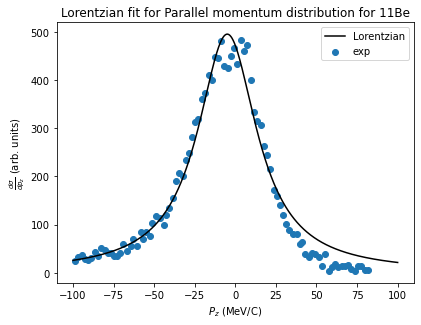

In [18]:
#fitting a Lorentzian to the experimental data points to 11Be
def lorentzian(x, a, c, w):
    return (a*w**2/((x-c)**2+w**2))

pars1, cov1 = curve_fit(f=lorentzian, xdata=exp['momentum'], ydata=exp['differential cross section'], p0=[1, 0, 2], bounds=(-np.inf, np.inf))
print(pars1)

plt.scatter(exp['momentum'], exp['differential cross section'], label = 'Data')
x3 = np.linspace(-100,100,1000)
plt.plot(x3,lorentzian(x3,*pars1), label = 'fit', color = 'Black')
plt.legend(["Lorentzian", "exp"])
plt.xlabel('$P_z$ (MeV/C)')
plt.ylabel(r'$\frac{d\sigma}{dp_z}$ (arb. units)')
plt.title("Lorentzian fit for Parallel momentum distribution for 11Be")
plt.rcParams["figure.figsize"] = (6.4,4.8)

print( "Root Mean squared Error: " ,math.sqrt(np.mean((exp['differential cross section']- lorentzian(exp['momentum'], *pars1))**2)))
ssr = np.sum((lorentzian(exp['momentum'], *pars1) - np.mean(exp['differential cross section']))**2)
sse = np.sum((exp['differential cross section']- lorentzian(exp['momentum'], *pars1))**2)
sst = ssr+sse;

print("R2: " ,ssr/sst)

plt.show()


Root Mean squared Error:  1.777978427380408
R2:  0.984077487335326


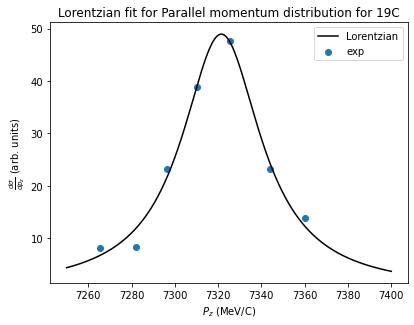

In [19]:
pars4, cov4 = curve_fit(f=lorentzian, xdata= C19exp['momentum'], ydata= C19exp['differential cross section'], p0=[1, 7325, 2], bounds=(-np.inf, np.inf))
#print(pars1)

plt.scatter(C19exp['momentum'], C19exp['differential cross section'], label = 'Data')
x4 = np.linspace(7250,7400,1000)
plt.plot(x4,lorentzian(x4,*pars4), label = 'fit', color = 'Black')
plt.legend(["Lorentzian", "exp"])
plt.xlabel('$P_z$ (MeV/C)')
plt.ylabel(r'$\frac{d\sigma}{dp_z}$ (arb. units)')
plt.title("Lorentzian fit for Parallel momentum distribution for 19C")
plt.rcParams["figure.figsize"] = (6.4,4.8)

print( "Root Mean squared Error: " ,math.sqrt(np.mean((C19exp['differential cross section']- lorentzian(C19exp['momentum'], *pars4))**2)))
ssr = np.sum((lorentzian(C19exp['momentum'], *pars4) - np.mean(C19exp['differential cross section']))**2)
sse = np.sum((C19exp['differential cross section']- lorentzian(C19exp['momentum'], *pars4))**2)
sst = ssr+sse;

print("R2: " ,ssr/sst)

plt.show()

In [53]:
from heapq import nsmallest

def fwhm(y_values_temp, x_values):
    y_values, temp_l, temp_r = [], [], []

    # To make 'y_values_temp', a numpy array, into a python list
    for x in range(0,len(y_values_temp)):
        #print(y_values_temp[x], " ", x_values[x])
        y_values.append(y_values_temp[x])
    peak_height = max(y_values)
    #print(peak_height)
    half_peak_height = max(y_values)/2
    #print(half_peak_height)
    
    # Splitting the y_values data into before and after x_value at peak height
    y_l_temp = y_values[0:y_values.index(peak_height)]
    #print(y_l_temp)
    y_r_temp = y_values[y_values.index(peak_height):len(y_values)]
    #print(y_r_temp)
    
    # Finds 1st closest value to half_peak_height in y_l and y_r
    y_l = nsmallest(1, y_l_temp, key=lambda x: abs(x-half_peak_height))
    #print(y_l)
    y_r = nsmallest(1, y_r_temp, key=lambda x: abs(x-half_peak_height))
    #print(y_r)
    
    # Gets x_value pairs for y_l and y_r
    temp_l.append(x_values[y_l_temp.index(y_l[0])])
    #print(temp_l)
    temp_r.append(x_values[y_r_temp.index(y_r[0]) + len(y_l_temp)])
    #print(temp_r)
    fwhm_n = temp_l[0] - temp_r[0]
    return abs(fwhm_n)

print("Comparision of FWHM for 11 Be:")
print("Theoritical: ", fwhm(sf1*Be11Df["differential cross section"], Be11Df["momentum"]))
print("Gaussian: ", fwhm(gaussian(x1,*pars), x1))
print("Lorentzian: ", fwhm(lorentzian(x3, *pars1), x3))

print("Comparision of FWHM for 19 C:")
print("Theoritical: ", fwhm(C19Df["differential cross section"], C19Df["momentum"]))
print("Gaussian: ", fwhm(gaussian(x2,*pars3), x2))
print("Lorentzian: ", fwhm(lorentzian(x4, *pars4), x4))

Comparision of FWHM for 11 Be:
Theoritical:  42.0
Gaussian:  54.20542054205421
Lorentzian:  44.44444444444444
Comparision of FWHM for 19 C:
Theoritical:  40.646492434659194
Gaussian:  52.97029702970303
Lorentzian:  44.74474474474482
